In [1]:
import sys
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import iqr
from matplotlib import pyplot

# Local imports
sys.path.append('..')

from lib.autoencoder import Autoencoder
from lib.autoencoder_dataset import AutoencoderDataset

Remainder: 0
Num parts: 336.0


<AxesSubplot:>

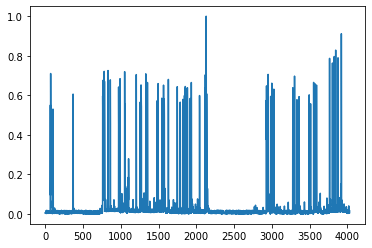

In [2]:
data_file = "../Datasets/ec2_cpu_utilization_fe7f93.csv"
df = pd.read_csv(data_file)

window_size = 12
num_rows = len(df)

# Drop last remainder frames
remainder = num_rows % window_size
num_parts = (num_rows - remainder) / window_size

print("Remainder: {}".format(remainder))
print("Num parts: {}".format(num_parts))

# Dropping last n rows using drop
if remainder > 0:
    df.drop(df.tail(remainder).index, inplace = True)

df = (df['value']-df['value'].min())/(df['value'].max()-df['value'].min())
df.plot()

<AxesSubplot:>

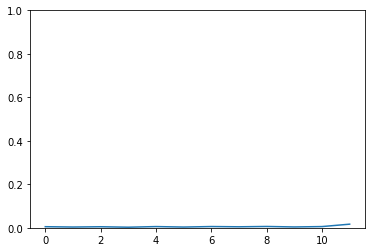

In [3]:
# Visualize the first window
ylim = (df.min(), df.max())
df_vector = df.head(window_size)
df_vector.plot(ylim=ylim)

In [4]:
stream_data = np.array(np.array_split(df, num_parts))

# for stream in stream_data:
#     temp_df = pd.DataFrame(stream, columns=['value'])
#     temp_df.plot(ylim=ylim)

In [5]:
# Autoencoder parameter for layers. First element is the size of the input vector. Succeeding values are hidden layers for the encoder
layers = [window_size, int(window_size - 3)]
print("layers: {}".format(layers))

# Autoencoder parameter for hidden activation
h_activation = 'relu'

# Autoencoder parameter for output activation
o_activation = 'sigmoid'

# Autoencoder parameter for learning rate
learning_rate = 0.0001

# Torch parameter for device
device = 'cpu'

# Training parameter for number of epochs
epochs = 100

# Training parameter for batch size
batch_size = 1

# Loss function
loss_fn = nn.MSELoss()

# DBSCAN parameter eps
eps = 0.1

# DBSCAN parameter minimum samples
min_samples = 5

layers: [12, 9]


In [6]:
model = Autoencoder(layers=layers, h_activation=h_activation, o_activation=o_activation, device=device)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Represent the training data as x
x = torch.tensor(stream_data).float().to(device)

# Load the dataset
train_ds = AutoencoderDataset(x=x)

# Create a DataLoader instance
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False, drop_last=False)

# The training process
for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    loop = tqdm(train_loader)
    
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Feed forward
        predictions = model(data)
        
        loss = loss_fn(predictions, targets)
        
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm
        loop.set_postfix(loss=loss.item())
        
print("Done training!")

Epoch: 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 973.56it/s, loss=0.219]


Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1122.98it/s, loss=0.201]


Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1182.46it/s, loss=0.182]


Epoch: 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1185.71it/s, loss=0.16]


Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1174.41it/s, loss=0.137]


Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1032.80it/s, loss=0.114]


Epoch: 6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1138.83it/s, loss=0.0938]


Epoch: 7


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1216.74it/s, loss=0.0761]


Epoch: 8


 43%|███████████████████████████████████████████████████████████████████▏                                                                                          | 143/336 [00:00<00:00, 1424.84it/s, loss=0.066]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1444.06it/s, loss=0.021]


Epoch: 14


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1449.24it/s, loss=0.0171]


Epoch: 15


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1427.78it/s, loss=0.0141]


Epoch: 16


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1443.20it/s, loss=0.0116]


Epoch: 17


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1465.96it/s, loss=0.00967]


Epoch: 18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1487.91it/s, loss=0.00809]


Epoch: 19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1524.18it/s, loss=0.00681]


Epoch: 20


  0%|                                                                                                                                                                        | 0/336 [00:00<?, ?it/s, loss=0.00291]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1306.33it/s, loss=0.00255]


Epoch: 27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1327.68it/s, loss=0.00231]


Epoch: 28


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1537.81it/s, loss=0.00211]


Epoch: 29


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1378.13it/s, loss=0.00195]


Epoch: 30


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1398.96it/s, loss=0.00182]


Epoch: 31


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1385.43it/s, loss=0.00172]


Epoch: 32


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1056.36it/s, loss=0.00165]


Epoch: 33


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1385.40it/s, loss=0.00159]


Epoch: 34


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1289.03it/s, loss=0.00155]


Epoch: 35


  0%|                                                                                                                                                                       | 0/336 [00:00<?, ?it/s, loss=0.000932]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1506.23it/s, loss=0.00147]


Epoch: 41


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1295.69it/s, loss=0.00147]


Epoch: 42


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1553.42it/s, loss=0.00146]


Epoch: 43


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1265.13it/s, loss=0.00146]


Epoch: 44


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1338.13it/s, loss=0.00145]


Epoch: 45


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1347.02it/s, loss=0.00144]


Epoch: 46


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1252.61it/s, loss=0.00143]


Epoch: 47


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1379.17it/s, loss=0.00142]


Epoch: 48


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1414.39it/s, loss=0.0014]


Epoch: 49


  0%|                                                                                                                                                                           | 0/336 [00:00<?, ?it/s, loss=0.04]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1395.78it/s, loss=0.00125]


Epoch: 55


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1352.41it/s, loss=0.00121]


Epoch: 56


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1442.56it/s, loss=0.00118]


Epoch: 57


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1329.36it/s, loss=0.00114]


Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1378.05it/s, loss=0.0011]


Epoch: 59


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1315.26it/s, loss=0.00106]


Epoch: 60


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1444.75it/s, loss=0.00102]


Epoch: 61


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1351.33it/s, loss=0.000973]


Epoch: 62


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1321.96it/s, loss=0.000932]


Epoch: 63


 47%|████████████████████████████████████████████████████████████████████████▉                                                                                   | 157/336 [00:00<00:00, 1569.19it/s, loss=0.00105]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1452.99it/s, loss=0.000688]


Epoch: 70


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1330.03it/s, loss=0.000661]


Epoch: 71


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1451.04it/s, loss=0.000636]


Epoch: 72


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1366.97it/s, loss=0.000613]


Epoch: 73


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1222.47it/s, loss=0.00059]


Epoch: 74


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1438.14it/s, loss=0.000567]


Epoch: 75


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1329.68it/s, loss=0.000545]


Epoch: 76


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1380.07it/s, loss=0.000526]


Epoch: 77


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 287/336 [00:00<00:00, 1296.15it/s, loss=0.00063]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1492.90it/s, loss=0.000414]


Epoch: 84


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1207.96it/s, loss=0.000401]


Epoch: 85


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1370.96it/s, loss=0.00039]


Epoch: 86


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1478.40it/s, loss=0.000378]


Epoch: 87


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1391.52it/s, loss=0.000367]


Epoch: 88


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1422.35it/s, loss=0.000357]


Epoch: 89


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1508.70it/s, loss=0.000346]


Epoch: 90


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1377.15it/s, loss=0.000336]


Epoch: 91


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1357.85it/s, loss=0.000325]


Epoch: 92


  0%|                                                                                                                                                                       | 0/336 [00:00<?, ?it/s, loss=0.000456]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1536.54it/s, loss=0.000263]


Epoch: 99


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 1586.72it/s, loss=0.000254]

Done training!


In [7]:
z = model.encode(x).detach().cpu().numpy().astype(np.float32)

columns = []

for i in range(len(z[0])):
    columns.append("x{}".format(i))

df_z = pd.DataFrame(z, columns=columns)

# Normalize the data with MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(df_z.values)

# Reassign to df_z
df_z = pd.DataFrame(z_scaled, columns=columns)

# Fetch the errors per data
predictions = model(x)
targets = x

x_loss = nn.MSELoss(reduction='none')(predictions, targets).sum(axis=1).detach().cpu().numpy().astype(np.float32)
df_z['error'] = x_loss

df_z

,x0,x1,x2,x3,x4,x5,x6,x7,x8,error
0,0.972875,0.729994,0.757258,0.010749,0.0,0.766829,0.980364,0.983284,0.831974,0.003638
1,0.984464,0.727030,0.752742,0.015349,0.0,0.773359,0.987214,0.989844,0.820943,0.003979
2,0.977550,0.731509,0.757269,0.011382,0.0,0.764022,0.986408,0.987463,0.827736,0.003720
3,0.971030,0.729203,0.756189,0.011104,0.0,0.766050,0.980054,0.982926,0.830459,0.003575
4,0.972633,0.730534,0.755976,0.010870,0.0,0.766887,0.982553,0.985032,0.828601,0.003560
...,...,...,...,...,...,...,...,...,...,...
331,0.920391,0.719577,0.729562,0.015146,0.0,0.732146,0.946942,0.961393,0.801424,0.002415
332,0.922459,0.720305,0.727344,0.014433,0.0,0.732257,0.950355,0.964447,0.800337,0.002675
333,0.970756,0.732716,0.755132,0.010984,0.0,0.766714,0.983285,0.983075,0.825314,0.003430
334,0.931327,0.710129,0.762207,0.020825,0.0,0.753832,0.937177,0.951124,0.830322,0.003205


In [8]:
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(df_z.values)

unique_labels = np.unique(clustering.labels_)

print("Cluster labels: {}".format(unique_labels))

df_z_with_cluster_labels = df_z.copy()
df_z_with_cluster_labels['cluster_label'] = clustering.labels_

for cluster_label in unique_labels:
    count = len(df_z_with_cluster_labels[df_z_with_cluster_labels['cluster_label'] == cluster_label])
    print("Count for Cluster {}: {}".format(cluster_label, count))
    
df_z_with_cluster_labels

Cluster labels: [-1  0]
Count for Cluster -1: 73
Count for Cluster 0: 263


,x0,x1,x2,x3,x4,x5,x6,x7,x8,error,cluster_label
0,0.972875,0.729994,0.757258,0.010749,0.0,0.766829,0.980364,0.983284,0.831974,0.003638,0
1,0.984464,0.727030,0.752742,0.015349,0.0,0.773359,0.987214,0.989844,0.820943,0.003979,0
2,0.977550,0.731509,0.757269,0.011382,0.0,0.764022,0.986408,0.987463,0.827736,0.003720,0
3,0.971030,0.729203,0.756189,0.011104,0.0,0.766050,0.980054,0.982926,0.830459,0.003575,0
4,0.972633,0.730534,0.755976,0.010870,0.0,0.766887,0.982553,0.985032,0.828601,0.003560,0
...,...,...,...,...,...,...,...,...,...,...,...
331,0.920391,0.719577,0.729562,0.015146,0.0,0.732146,0.946942,0.961393,0.801424,0.002415,0
332,0.922459,0.720305,0.727344,0.014433,0.0,0.732257,0.950355,0.964447,0.800337,0.002675,0
333,0.970756,0.732716,0.755132,0.010984,0.0,0.766714,0.983285,0.983075,0.825314,0.003430,0
334,0.931327,0.710129,0.762207,0.020825,0.0,0.753832,0.937177,0.951124,0.830322,0.003205,0


In [9]:
df_normal = pd.DataFrame(stream_data)

df_normal = df_normal[df_z_with_cluster_labels['cluster_label'] != -1]

df_normal

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.005068,0.003515,0.004843,0.002718,0.005620,0.003433,0.005783,0.004618,0.006131,0.003883,0.005640,0.016696
1,0.006437,0.002391,0.005068,0.002575,0.005252,0.002759,0.006131,0.002759,0.018270,0.004005,0.005109,0.003413
2,0.004945,0.003270,0.005620,0.003740,0.005252,0.003944,0.005415,0.003147,0.005395,0.016696,0.006376,0.003658
3,0.005538,0.002616,0.005885,0.003127,0.006212,0.003638,0.006785,0.004332,0.006417,0.004435,0.006212,0.016062
4,0.005293,0.003740,0.005988,0.003454,0.005477,0.004394,0.006662,0.003576,0.005988,0.004435,0.009523,0.011403
...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.009114,0.013876,0.009135,0.013549,0.033290,0.013038,0.009278,0.013528,0.009482,0.013631,0.022418,0.013120
332,0.008685,0.013058,0.009298,0.013283,0.036089,0.013712,0.009543,0.013712,0.009584,0.013590,0.021028,0.009911
333,0.005559,0.008113,0.004169,0.007316,0.003065,0.006744,0.003372,0.007520,0.003004,0.006396,0.015490,0.005967
334,0.002452,0.006580,0.003229,0.006315,0.002861,0.006253,0.003024,0.006335,0.016001,0.006029,0.032084,0.040524


In [10]:
# Represent the training data as x
x = torch.tensor(df_normal.values).float().to(device)

# Load the dataset
train_ds = AutoencoderDataset(x=x)

# Create a DataLoader instance
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False, drop_last=False)

# The training process
for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    loop = tqdm(train_loader)
    
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Feed forward
        predictions = model(data)
        
        loss = loss_fn(predictions, targets)
        
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm
        loop.set_postfix(loss=loss.item())
        
print("Done training!")

Epoch: 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1502.78it/s, loss=0.000233]


Epoch: 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1425.29it/s, loss=0.000211]


Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1320.23it/s, loss=0.00019]


Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1427.02it/s, loss=0.00017]


Epoch: 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1481.61it/s, loss=0.000152]


Epoch: 5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1458.57it/s, loss=0.000135]


Epoch: 6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1284.49it/s, loss=0.000119]


Epoch: 7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1329.13it/s, loss=0.000105]


Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1464.18it/s, loss=9.23e-5]


Epoch: 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1261.78it/s, loss=8.08e-5]


Epoch: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1371.72it/s, loss=7.07e-5]


Epoch: 11


  0%|                                                                                                                                                                       | 0/263 [00:00<?, ?it/s, loss=0.000128]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1360.50it/s, loss=2.65e-5]


Epoch: 19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1338.69it/s, loss=2.42e-5]


Epoch: 20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1355.93it/s, loss=2.23e-5]


Epoch: 21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1251.32it/s, loss=2.08e-5]


Epoch: 22


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1374.71it/s, loss=1.96e-5]


Epoch: 23


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1299.36it/s, loss=1.86e-5]


Epoch: 24


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1243.72it/s, loss=1.79e-5]


Epoch: 25


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1035.67it/s, loss=1.73e-5]


Epoch: 26


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1039.30it/s, loss=1.69e-5]


Epoch: 27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1136.94it/s, loss=1.66e-5]


Epoch: 28


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1209.41it/s, loss=1.63e-5]


Epoch: 29


  0%|                                                                                                                                                                        | 0/263 [00:00<?, ?it/s, loss=6.71e-5]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1468.82it/s, loss=1.6e-5]


Epoch: 35


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1361.65it/s, loss=1.61e-5]


Epoch: 36


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1149.44it/s, loss=1.61e-5]


Epoch: 37


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1086.18it/s, loss=1.61e-5]


Epoch: 38


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1398.29it/s, loss=1.62e-5]


Epoch: 39


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1409.75it/s, loss=1.62e-5]


Epoch: 40


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1279.65it/s, loss=1.62e-5]


Epoch: 41


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1167.90it/s, loss=1.63e-5]


Epoch: 42


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1057.28it/s, loss=1.63e-5]


Epoch: 43


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1126.24it/s, loss=1.63e-5]


Epoch: 44


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1223.08it/s, loss=1.63e-5]


Epoch: 45


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1097.55it/s, loss=1.64e-5]


Epoch: 46


  0%|                                                                                                                                                                        | 0/263 [00:00<?, ?it/s, loss=4.04e-5]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1467.70it/s, loss=1.65e-5]


Epoch: 52


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1253.63it/s, loss=1.65e-5]


Epoch: 53


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1072.91it/s, loss=1.65e-5]


Epoch: 54


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1175.22it/s, loss=1.65e-5]


Epoch: 55


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1219.77it/s, loss=1.65e-5]


Epoch: 56


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1364.76it/s, loss=1.65e-5]


Epoch: 57


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1435.42it/s, loss=1.65e-5]


Epoch: 58


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1489.86it/s, loss=1.65e-5]


Epoch: 59


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1452.04it/s, loss=1.65e-5]


Epoch: 60


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1401.25it/s, loss=1.65e-5]


Epoch: 61


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1346.41it/s, loss=1.64e-5]


Epoch: 62


 59%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 154/263 [00:00<00:00, 1534.32it/s, loss=0.000245]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1487.36it/s, loss=1.63e-5]


Epoch: 70


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1476.09it/s, loss=1.63e-5]


Epoch: 71


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1446.18it/s, loss=1.62e-5]


Epoch: 72


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1413.52it/s, loss=1.62e-5]


Epoch: 73


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1453.92it/s, loss=1.62e-5]


Epoch: 74


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1384.59it/s, loss=1.61e-5]


Epoch: 75


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1394.22it/s, loss=1.61e-5]


Epoch: 76


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1388.27it/s, loss=1.61e-5]


Epoch: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1302.37it/s, loss=1.6e-5]


Epoch: 78


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1372.81it/s, loss=1.6e-5]


Epoch: 79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1251.77it/s, loss=1.6e-5]


Epoch: 80


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1401.23it/s, loss=1.59e-5]


Epoch: 81


  0%|                                                                                                                                                                        | 0/263 [00:00<?, ?it/s, loss=3.26e-5]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1189.93it/s, loss=1.56e-5]


Epoch: 88


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1245.84it/s, loss=1.55e-5]


Epoch: 89


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1312.72it/s, loss=1.55e-5]


Epoch: 90


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1393.66it/s, loss=1.54e-5]


Epoch: 91


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1325.47it/s, loss=1.54e-5]


Epoch: 92


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1348.14it/s, loss=1.53e-5]


Epoch: 93


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1368.16it/s, loss=1.52e-5]


Epoch: 94


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1399.28it/s, loss=1.52e-5]


Epoch: 95


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1331.81it/s, loss=1.51e-5]


Epoch: 96


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1324.03it/s, loss=1.5e-5]


Epoch: 97


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 1406.42it/s, loss=1.5e-5]


Epoch: 98


 56%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 148/263 [00:00<00:00, 1478.64it/s, loss=2.05e-5]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



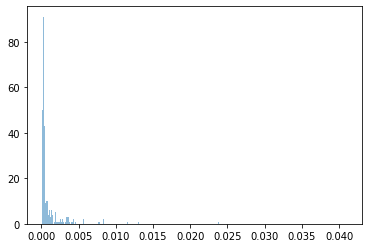

Bin Width: 0.00014769889707271595
Num Bins: 276
Max Loss: 0.04101012647151947
Min Loss: 0.0001033251392072998
Min Bin: 0.0001033251392072998
Max Bin: 0.04111345112323761
Optimal Threshold: 0.0238030177921325


In [11]:
"""
Utility Functions
"""
# Head tail break function
def htb(data):
    outp = []
    
    def htb_inner(data):
        data_length = float(len(data))
        data_mean = sum(data) / data_length
        
        head = [_ for _ in data if _ > data_mean]
        outp.append(data_mean)
        
        while len(head) > 1 and len(head) / data_length < 0.40:
            return htb_inner(head)
        
    htb_inner(data)
    
    return outp

# Determine a breakpoint
def fetch_threshold(bins, counts, break_point):
    index = 0
    latest_min = 999999
    threshold = -1
    
    for i in range(len(counts)):
        diff = abs(counts[i] - break_point)
        
        if diff <= latest_min:
            latest_min = diff
            index = i
            threshold = ((bins[i + 1] - bins[i]) / 2) + bins[i]
            
    return threshold

predictions = model(x)
targets = x

x_loss = nn.MSELoss(reduction='none')(predictions, targets).sum(axis=1).detach().cpu().numpy().astype(np.float32)

max_loss = np.max(x_loss)
min_loss = np.min(x_loss)

# Compute the optimal bin width using Freedman Diaconis rule
bin_width = 2 * (iqr(x_loss) / (len(x_loss) ** (1./3)))

if(bin_width == 0):
    bin_width = 0.01
num_bins = int((max_loss - min_loss) / bin_width)

# Create the histogram
min_bin = np.min(x_loss)
max_bin = np.max(x_loss) + min_bin

step = (max_bin - min_bin) / num_bins

bins = np.arange(min_bin, max_bin, step)

hist, bins = np.histogram(x_loss, bins=bins)

pyplot.hist(x_loss, bins, alpha=0.5)
pyplot.show()

print("Bin Width: {}".format(bin_width))
print("Num Bins: {}".format(num_bins))
print("Max Loss: {}".format(max_loss))
print("Min Loss: {}".format(min_loss))
print("Min Bin: {}".format(min_bin))
print("Max Bin: {}".format(max_bin))



# Determine breaks
breaks = htb(hist)

possible_thresholds = []

for b in breaks:
    t = fetch_threshold(bins, hist, b)
    possible_thresholds.append(t)

optimal_threshold = max(possible_thresholds)

print("Optimal Threshold: {}".format(optimal_threshold))

In [12]:
# Convert test data to tensor
x = torch.tensor(stream_data).float().to(device)

predictions = model(x)
targets = x

# Get reconstruction error
x_loss = nn.MSELoss(reduction='none')(predictions, targets).sum(axis=1).detach().cpu().numpy().astype(np.float32)

# If reconstruction error is >= than the optimal threshold, we consider it an anomaly
bool_arr = x_loss >= optimal_threshold

# Convert anomaly labels to -1 if True and 1 if False
anomaly_predictions = np.array([-1 if elem else 1 for elem in bool_arr])

# Build dataframe for test data and attach predictions
df_test_x_with_labels = pd.DataFrame(stream_data)
df_test_x_with_labels['y'] = anomaly_predictions

df_test_x_with_labels

,0,1,2,3,4,5,6,7,8,9,10,11,y
0,0.005068,0.003515,0.004843,0.002718,0.005620,0.003433,0.005783,0.004618,0.006131,0.003883,0.005640,0.016696,1
1,0.006437,0.002391,0.005068,0.002575,0.005252,0.002759,0.006131,0.002759,0.018270,0.004005,0.005109,0.003413,1
2,0.004945,0.003270,0.005620,0.003740,0.005252,0.003944,0.005415,0.003147,0.005395,0.016696,0.006376,0.003658,1
3,0.005538,0.002616,0.005885,0.003127,0.006212,0.003638,0.006785,0.004332,0.006417,0.004435,0.006212,0.016062,1
4,0.005293,0.003740,0.005988,0.003454,0.005477,0.004394,0.006662,0.003576,0.005988,0.004435,0.009523,0.011403,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.009114,0.013876,0.009135,0.013549,0.033290,0.013038,0.009278,0.013528,0.009482,0.013631,0.022418,0.013120,1
332,0.008685,0.013058,0.009298,0.013283,0.036089,0.013712,0.009543,0.013712,0.009584,0.013590,0.021028,0.009911,1
333,0.005559,0.008113,0.004169,0.007316,0.003065,0.006744,0.003372,0.007520,0.003004,0.006396,0.015490,0.005967,1
334,0.002452,0.006580,0.003229,0.006315,0.002861,0.006253,0.003024,0.006335,0.016001,0.006029,0.032084,0.040524,1


In [13]:
stream_data_with_labels = []
for index, row in df_test_x_with_labels.iterrows():
    label = row['y']
    for point in row[:-1].values:
        stream_data_with_labels.append([point, label])

stream_data_with_labels = pd.DataFrame(stream_data_with_labels, columns=['value', 'y'])


<AxesSubplot:>

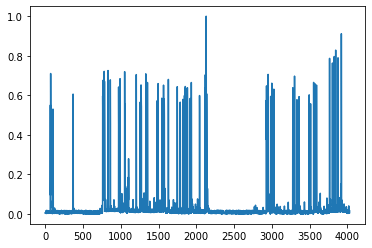

In [14]:
df.plot()

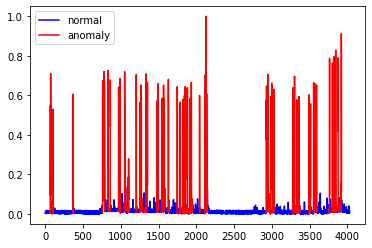

In [15]:

plt.plot(np.where(stream_data_with_labels["y"]==1, stream_data_with_labels["value"], None), color="blue", label="normal")
plt.plot(np.where(stream_data_with_labels["y"]==-1, stream_data_with_labels["value"], None), color="red", label="anomaly")
plt.legend()